# Notebook - EDA on Burned Area

## Import Modules

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "Times New Roman")
save_format = "svg"

## Load Datasets

In [2]:
# Load dataset
burned_area = np.load(file = "../dataset/burned_area.npy")
# retain last 10 years
burned_area = burned_area[(1800 - 10 * 12):burned_area.shape[0],:,:]

## Data Preprocessing

In [3]:
valid_grid = []
for i in range(burned_area.shape[1]):
    for j in range(burned_area.shape[2]):
        if np.sum(burned_area[:,i,j]) > 0:
            valid_grid.append([i,j])

In [4]:
df = pd.DataFrame(columns = ["Burned Area","Latitude","Longitude","time","month"])
for i in tqdm(range(len(valid_grid)), desc='Processing'):
    index_value = valid_grid[i]
    temp_df = pd.DataFrame()
    temp_df["Burned Area"] = burned_area[:,index_value[0],index_value[1]].tolist()
    temp_df["Latitude"] = index_value[0]
    temp_df["Longitude"] = index_value[1]
    temp_df["time"] = [i for i in range(burned_area.shape[0])]
    temp_df["month"] = [12,1,2,3,4,5,6,7,8,9,10,11] * 10
    df = pd.concat([df,temp_df])

Processing:   0%|          | 0/3036 [00:00<?, ?it/s]C:\Users\A\AppData\Local\Temp\ipykernel_49840\1176082368.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,temp_df])
Processing: 100%|██████████| 3036/3036 [00:16<00:00, 185.20it/s]


In [5]:
df["Ln(Burned Area)"] = df["Burned Area"].apply(lambda x : np.log(x))
df.replace([np.inf, -np.inf], None, inplace=True)
df.dropna(axis = 0, inplace = True)
df = df.loc[df["Ln(Burned Area)"] > 0]

C:\Users\A\AppData\Local\Temp\ipykernel_49840\1689388181.py:1: RuntimeWarning: divide by zero encountered in log
  df["Ln(Burned Area)"] = df["Burned Area"].apply(lambda x : np.log(x))


## Plots

In [6]:
data = df["Burned Area"]
plt.hist(data, bins = 20, density = True, label = "Burned Area", color = "darkred")
sns.kdeplot(data, label = "Density", color = "k")
plt.grid(False)
plt.legend(loc = "best")
plt.savefig("EDA_Burned Area_hist."+save_format,bbox_inches="tight")
plt.close()

In [7]:
data = df["Ln(Burned Area)"]
plt.hist(data, bins = 20, density = True, label = "Ln(Burned Area)", color = "lightgray")
sns.kdeplot(data, label = "Density", color = "darkgoldenrod")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.grid(False)
plt.legend(loc = "best")
plt.savefig("EDA_Ln(Burned Area)_hist."+save_format,bbox_inches="tight")
plt.close()

In [8]:
sns.violinplot(x=df["Burned Area"],color="darkred")
plt.grid(False)
plt.ylabel("Distribution")
plt.savefig("EDA_Burned Area_violin."+save_format,bbox_inches="tight")
plt.close()

In [9]:
sns.violinplot(x=df["Ln(Burned Area)"], color = "grey")
plt.grid(False)
plt.ylabel("Distribution")
plt.savefig("EDA_Ln(Burned Area)_violin."+save_format,bbox_inches="tight")
plt.close()

In [10]:
plt.scatter(x= df.index, y = df["Burned Area"], marker = ".", s = 2, color = "darkred")
plt.xlabel("Burned Area")
plt.grid(False)
plt.ylabel("Value")
plt.savefig("EDA_Burned Area_scatter."+save_format,bbox_inches="tight")
plt.close()

In [11]:
plt.scatter(x= df.index, y = df["Ln(Burned Area)"], marker = ".", s = 2, color = "dimgray")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Burned Area")
plt.grid(False)
plt.ylabel("Value")
plt.savefig("EDA_Ln(Burned Area)_scatter."+save_format,bbox_inches="tight")
plt.close()

In [13]:
data = pd.read_parquet("../trained_model/Train-Result-0/feature_dataset.parquet")
data.head(5)

,fuel_load_cwdc,fuel_load_deadcrootc,fuel_wetness,fuel_temperature,climate_wind,climate_tbot,climate_rh2m,climate_rain,human_density,light_frequency,burned_area,burned_area_mom,burned_area_yoy,month,sequence,lat,lon,burned_area_mom_conv,burned_area_yoy_conv
13,7561.550781,1628.890381,15.854091,286.032379,7.046512,285.131561,70.106178,6.342207e-06,0.0,0.0,20.308575,20.198070,12.938129,1,13,20,116,-0.494787,-0.494787
14,7555.075684,1623.509644,21.707279,281.840027,5.995985,280.961029,79.511826,1.856513e-05,0.0,0.0,18.092081,20.308575,17.515179,2,14,20,116,-0.494787,-0.494787
24,7542.668457,1627.780029,19.441820,285.171783,7.605722,284.342224,74.797913,1.921032e-05,0.0,0.0,14.312170,12.150210,20.198070,12,24,20,116,-0.494787,-0.494787
48,7440.532227,1645.421143,17.187010,286.201935,7.744683,284.750763,72.208092,1.039567e-05,0.0,0.0,17.984037,15.976794,16.551419,12,48,20,116,-0.494787,-0.494787
49,7438.520508,1641.559692,14.183422,287.904083,6.968590,286.537903,67.215660,5.155291e-07,0.0,0.0,20.445893,17.984037,19.134339,1,49,20,116,-0.494787,-0.494787


In [14]:
ba_mom_lst = []
ba_conv_lst = []
for i in range(1, 13):
    temp_df = data.copy().loc[data.copy()["month"] == i]
    ba_mom = np.zeros([96, 144])
    ba_mom_conv = np.zeros([96, 144])
    for j in range(len(temp_df)):
        lat = int(temp_df.iloc[j]["lat"])
        lon = int(temp_df.iloc[j]["lon"])
        ba_mom[lat, lon] = temp_df.iloc[j]["burned_area_mom"]
        ba_mom_conv[lat, lon] = temp_df.iloc[j]["burned_area_mom_conv"]
    ba_mom_lst.append(ba_mom)
    ba_conv_lst.append(ba_mom_conv)

In [15]:
month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

In [23]:
counter = 1
for item in ba_mom_lst:
    plt.imshow(np.flip(item, axis=(0, 1)), cmap="gray_r")
    plt.grid(False)
    plt.annotate('Burned Area: ' + month_dict[counter]+'\nProcessing: Normal', (1.5, 1.5), fontsize=12,color="black",
                xytext=(0, -220), textcoords='offset points',
                bbox=dict(boxstyle='Square', fc='white', alpha=0.6))
    plt.axis('off')
    plt.savefig("EDA_Burned Area_Map_"+month_dict[counter]+"."+save_format,bbox_inches="tight")
    plt.close()
    counter += 1

In [24]:
counter = 1
for item in ba_conv_lst:
    plt.imshow(np.flip(item, axis=(0, 1)), cmap="gray_r")
    plt.grid(False)
    plt.annotate('Burned Area: ' + month_dict[counter]+'\nProcessing: Convolved', (1.5, 1.5), fontsize=12,color="black",
                 xytext=(0, -220), textcoords='offset points',
                 bbox=dict(boxstyle='Square', fc='white', alpha=0.6))
    plt.axis('off')
    plt.savefig("EDA_Burned Area_Map_Convolved"+month_dict[counter]+"."+save_format,bbox_inches="tight")
    plt.close()
    # plt.show()
    counter += 1

## Heatmaps

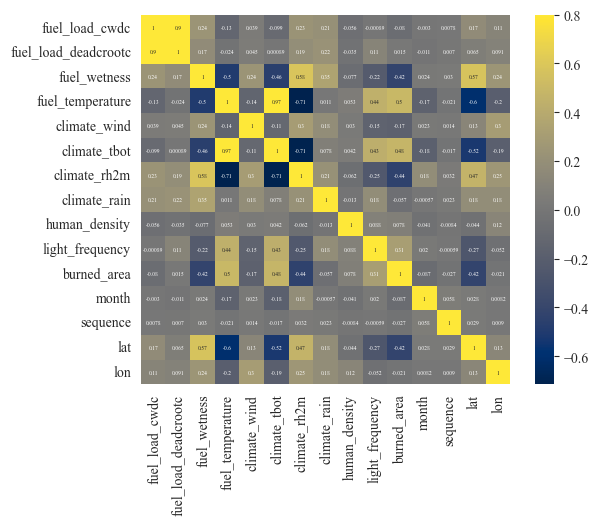

In [26]:
data_heat = data.copy()
del data_heat["burned_area_mom_conv"]
del data_heat["burned_area_yoy_conv"]
del data_heat["burned_area_mom"]
del data_heat["burned_area_yoy"]

fig = sns.heatmap(data_heat.corr(), vmax=.8, square=True, annot=True, annot_kws={"size":4}, cmap="cividis")
fig.figure.savefig("features heatmap."+save_format,bbox_inches="tight")